<img src="https://rhjunior.com.br/wp-content/uploads/2021/11/image-2.png" alt="Descrição da imagem">


# **Entendimento do Negócio**

### People Analytics: Transformando a Gestão de Recursos Humanos

People Analytics, ou análise de pessoas, é a prática de coletar, analisar e interpretar dados sobre os colaboradores de uma organização com o objetivo de melhorar a tomada de decisões relacionadas à gestão de pessoas. Esta abordagem combina técnicas de análise de dados, estatísticas e tecnologias avançadas para oferecer insights valiosos que podem ajudar a aumentar a eficiência, o engajamento e a satisfação dos funcionários.

### Contexto

Dados do Cadastro Geral de Empregados e Desempregados (Caged) apontam que o Brasil registra o maior índice de rotatividade de funcionários do mundo, com um aumento de 56% nessa taxa no levantamento mais recente, superando países como Reino Unido (43%), França (51%) e Bélgica (45%). A alta rotatividade de funcionários representa um desafio significativo para as organizações, impactando várias áreas críticas:

- **Custos de Contratação e Desligamento:**

    A rotatividade elevada acarreta custos substanciais com recrutamento, seleção, treinamento e rescisões contratuais. Esses gastos somam-se ao impacto financeiro direto de desligamentos frequentes.

- **Retenção Interferindo no Histórico de Projetos:**

    A saída frequente de funcionários prejudica a continuidade e a consistência nos projetos, resultando em atrasos, retrabalho e diminuição da qualidade entregue. Isso afeta diretamente a produtividade e a capacidade de cumprir compromissos.

- **Curvas de Aprendizado e Produtividade:**

    Novos funcionários precisam de tempo para se adaptar aos processos e à cultura organizacional. A rotatividade frequente prolonga essas curvas de aprendizado, reduzindo o desempenho individual e coletivo.

- **Desenvolvimento e Criação de Novos Talentos:**

    A retenção é crucial para o desenvolvimento contínuo de líderes e especialistas. Funcionários que permanecem têm a oportunidade de aprofundar suas competências e contribuir para a inovação e o crescimento da empresa. A rotatividade elevada dificulta esse processo, limitando a promoção de talentos internos.

Em suma, a alta rotatividade não só representa um custo financeiro significativo, mas também afeta a consistência operacional, a qualidade do trabalho e o desenvolvimento de talentos. Estratégias eficazes de retenção e gestão de pessoas são essenciais para mitigar esses impactos e promover um ambiente de trabalho estável e produtivo.

### Perguntas de Negócios

1. **Análise da Rotatividade:**
   - Quais são os principais fatores associados ao desligamento dos funcionários na nossa empresa?
   - Existe alguma correlação entre a idade dos funcionários e a probabilidade de desligamento?
   - Como a satisfação no trabalho influencia na taxa de rotatividade dos colaboradores?
   - Quais níveis de cargo têm a maior taxa de rotatividade e por quê?

2. **Perfil dos Funcionários Desligados:**
   - Quais são as características comuns dos funcionários que deixam a empresa em termos de idade, tempo de serviço e desempenho?
   - Existe uma relação entre a pontuação de desempenho dos funcionários e a probabilidade de desligamento?
   - Há diferenças significativas nos salários entre os funcionários que permanecem e os que saem?

3. **Impacto das Horas Extras:**
   - As horas extras têm alguma influência na decisão de um funcionário deixar a empresa?
   - Qual é o perfil dos funcionários que realizam mais horas extras e como isso se relaciona com a rotatividade?

4. **Análise Temporal e Padrões:**
   - Existe um padrão sazonal ou temporal nos desligamentos dos funcionários?
   - Como a duração do serviço dos funcionários afeta a probabilidade de desligamento?

5. **Previsão e Intervenção:**
   - Podemos identificar antecipadamente os funcionários com maior risco de desligamento com base nas características disponíveis?
   - Quais medidas ou políticas internas poderiam ser implementadas para reduzir a rotatividade?

# **Entendimento dos Dados**

### **Coleta dos dados**

Os dados fornecidos pelos organizadores do evento são do setor de Recursos Humanos de uma empresa de desenvolvimento de software, que optou por não se identificar. Podem ser acessados localmente através do caminho *hr-data-insights/data/employee_turnover_hr.xlsx*

In [1]:
# Loading Libs

import numpy as np
import pandas as pd


from scipy.stats import pointbiserialr
import statsmodels as sm

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format

# Loading Data

hr_data = hr_data = pd.read_excel('../data/raw/employee_turnover_hr.xlsx')

### **Descrição dos dados**

| **Variável** | **Descrição** | **Tipo** |
| -------- | ----------- | ----------- |
|Data_Contratacao|Data em que o funcionário foi contratado pela empresa| Data|
|Data_Desligamento|Data em que o funcionário se desligou da empresa| Data|
|Meses_de_Servico|Quantidade de meses completos que o funcionário trabalhou na empresa| Inteiro|
|Idade|Idade do funcionário no momento da contratação| Inteiro|
|Pontuacao_Desempenho|Representa a avaliação quantitativa do desempenho do funcionário em um determinado período|Flutuante|
|Satisfacao_Trabalho|Indica o nível de satisfação do funcionário com seu trabalho|Flutuante|
|Nivel_Cargo|Nível hierárquico do cargo|Texto|
|Salario|Salário bruto mensal do funcionário| Flutuante|
|Horas_Extras|Quantidade de horas extras trabalhadas pelo funcionário em um determinado período| Flutuante|
|Desligamento|Indica se o funcionário ainda está na empresa ou se já foi desligado|Inteiro|

### **Análise  Exploratória dos Dados**

In [2]:
hr_data.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
0,2024-02-14,NaT,3,24,2.07,2.04,Pleno,4994.41,15.47,0
1,2023-11-16,2024-05-14,6,43,3.26,1.71,Sênior,8798.34,19.04,1
2,2023-11-16,NaT,6,45,4.83,3.48,Sênior,8891.02,13.33,0
3,2023-05-20,NaT,12,31,1.45,1.62,Pleno,7606.22,14.21,0
4,2022-07-24,NaT,22,37,2.09,2.76,Sênior,9236.03,11.06,0


In [3]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data_Contratacao      650 non-null    datetime64[ns]
 1   Data_Desligamento     144 non-null    datetime64[ns]
 2   Meses_de_Servico      650 non-null    int64         
 3   Idade                 650 non-null    int64         
 4   Pontuacao_Desempenho  650 non-null    float64       
 5   Satisfacao_Trabalho   650 non-null    float64       
 6   Nivel_Cargo           650 non-null    object        
 7   Salario               650 non-null    float64       
 8   Horas_Extras          650 non-null    float64       
 9   Desligamento          650 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 50.9+ KB


In [4]:
hr_data.nunique()

Data_Contratacao         33
Data_Desligamento         1
Meses_de_Servico         33
Idade                    32
Pontuacao_Desempenho    650
Satisfacao_Trabalho     650
Nivel_Cargo               3
Salario                 650
Horas_Extras            540
Desligamento              2
dtype: int64

In [5]:
hr_data.describe(exclude=['datetime', 'object']).transpose()

,count,mean,std,min,25%,50%,75%,max
Meses_de_Servico,650.00,18.69,9.65,3.00,10.00,19.00,27.00,35.00
Idade,650.00,28.35,8.01,18.00,22.00,27.00,33.00,49.00
Pontuacao_Desempenho,650.00,3.03,1.17,1.00,1.99,3.06,4.02,4.99
Satisfacao_Trabalho,650.00,2.94,1.15,1.00,1.97,2.92,3.96,5.00
Salario,650.00,6131.59,2689.08,2004.50,4023.75,5562.95,7814.48,11957.29
Horas_Extras,650.00,10.10,6.24,0.00,4.98,9.41,14.75,41.64
Desligamento,650.00,0.22,0.42,0.00,0.00,0.00,0.00,1.00


#### **Respondendo as Perguntas de Negócio**

##### *Análise da Rotatividade: Existe alguma correlação entre a idade dos funcionários e a probabilidade de desligamento ?*

In [6]:
# Método Empregado: Coeficiente de Correlação de Ponto Bisserial

corr, p_value = pointbiserialr(hr_data.Idade, hr_data.Desligamento)

print(f'Grau de correlação: {corr:.2f}') # Correlação extremamente fraca
print(f'P-valor: {p_value:.2f}') # Hipótese nula não rejeitada

Grau de correlação: 0.01
P-valor: 0.85


*Resposta*

Não há evidência significativa entre a idade dos funcionários e a probabilidade de desligamento. Nesse caso a idade dos funcionários não pode ser considerada como fator relevante para prever o desligamento. Abaixo há uma visualização complementar confirmando a evidência.

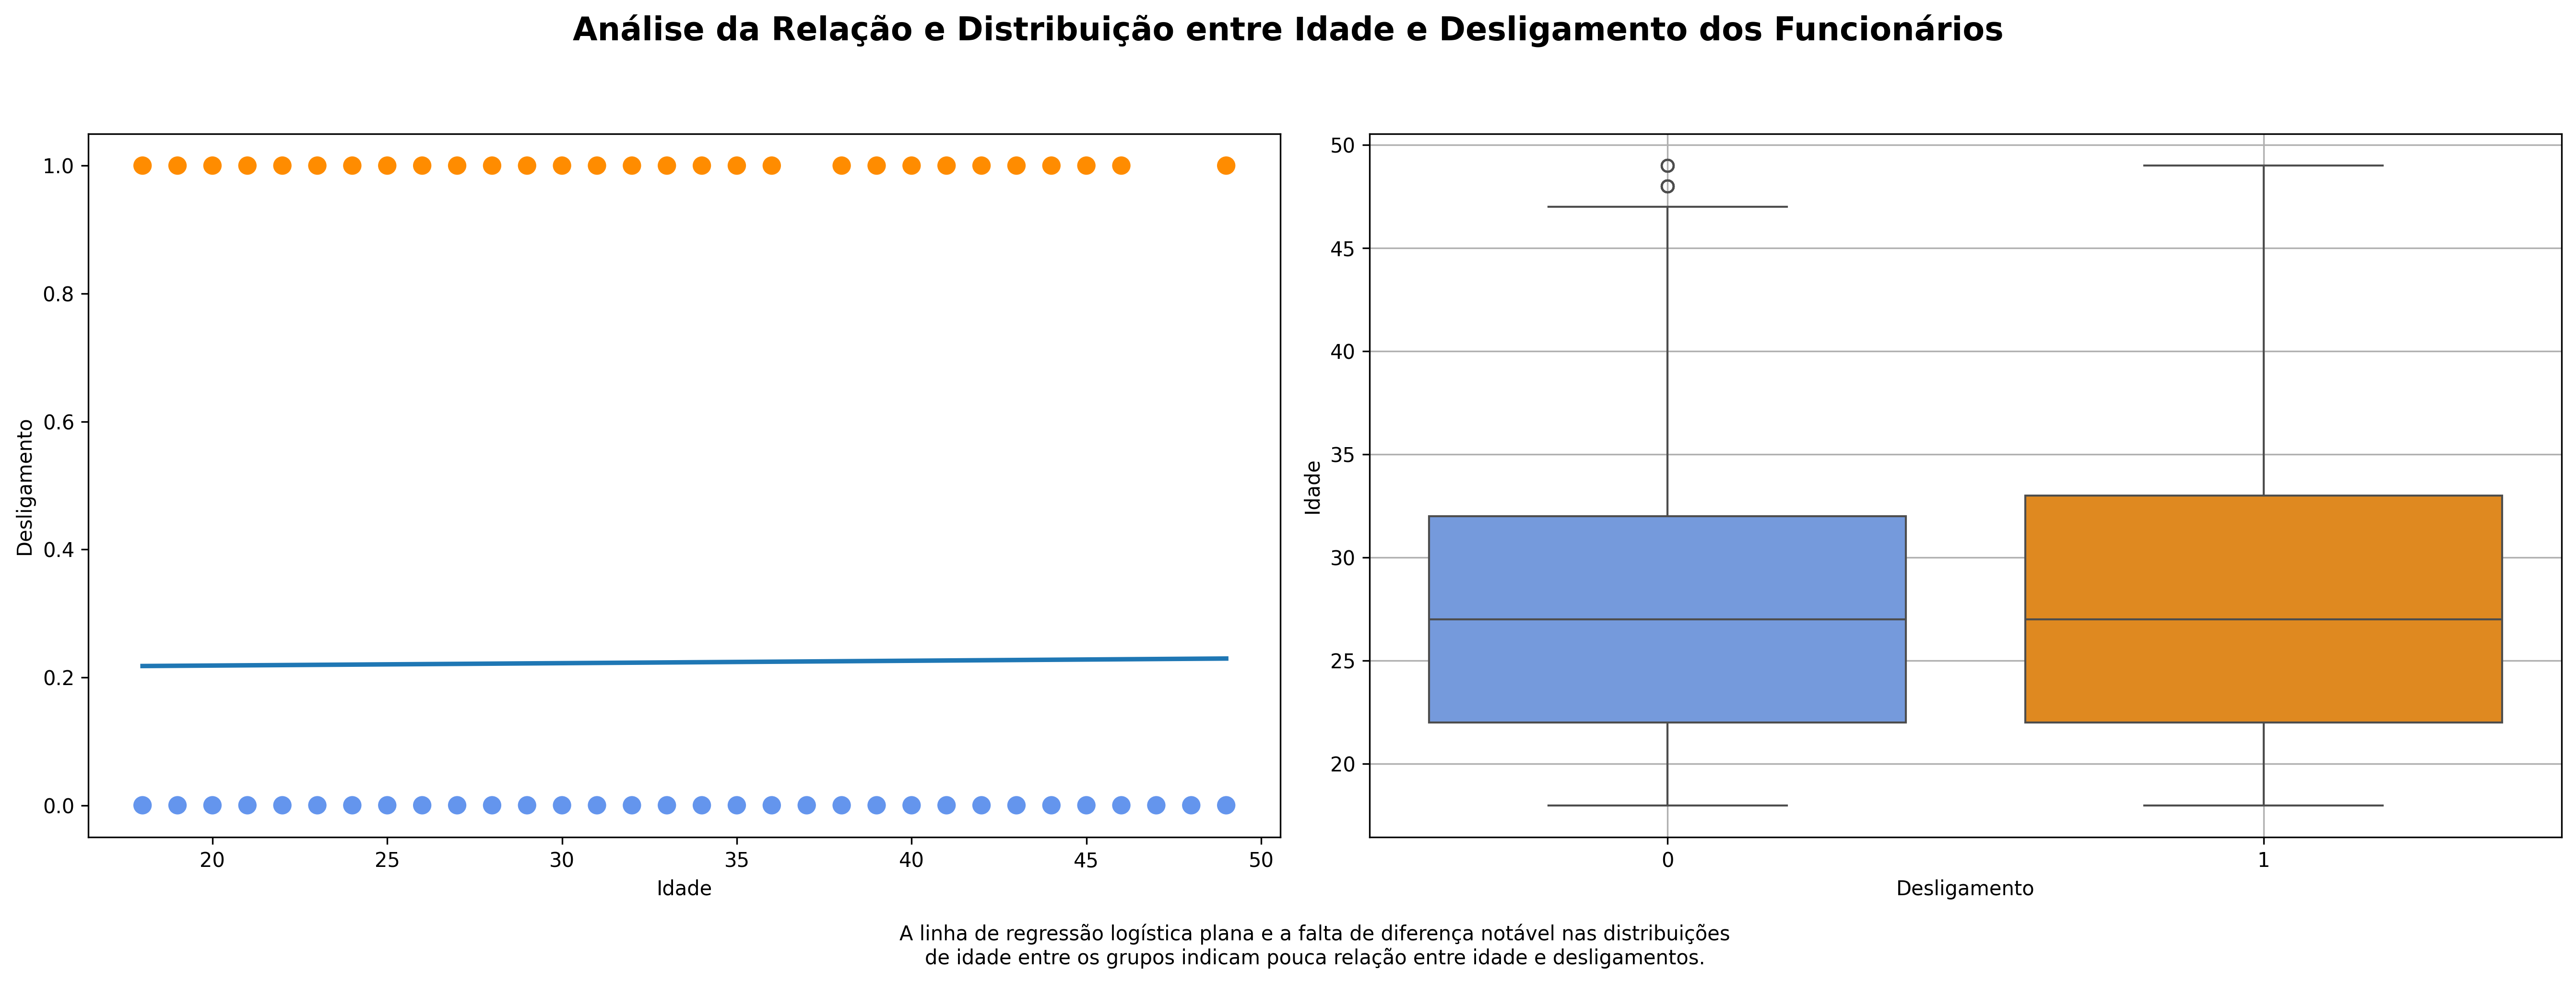

In [22]:
palette = {0: 'cornflowerblue', 1: 'darkorange'}

fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(18, 6),
    dpi=300
)

fig.suptitle(
    t='Análise da Relação e Distribuição entre Idade e Desligamento dos Funcionários',
    fontsize=16,
    y=1.05,
    weight=600
)

sns.scatterplot(
    ax=axes[0],
    x='Idade',
    y='Desligamento',
    data=hr_data,
    hue='Desligamento',
    palette=palette,
    s=100,
    legend=False
)

sns.regplot(
    ax=axes[0],
    x='Idade',
    y='Desligamento',
    data=hr_data,
    logistic=True,
    ci=None,
    scatter=False
)

sns.boxplot(
    ax=axes[1],
    x='Desligamento',
    y='Idade',
    data=hr_data,
    hue='Desligamento',
    palette=palette,
    legend=False
)

axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Desligamento')
axes[0].grid(False)

axes[1].set_xlabel('Desligamento')
axes[1].set_ylabel('Idade')
axes[1].grid(True)

fig.text(
    x=0.35,
    y=-0.05,
    s='''A linha de regressão logística plana e a falta de diferença notável nas distribuições
    de idade entre os grupos indicam pouca relação entre idade e desligamentos.'''
)

plt.tight_layout()

plt.savefig('../reports/figures/relacao-distribuicao-idade-desligamento.png', dpi=300)

plt.show()

##### *Análise de Rotatividade: Como a satisfação no trabalho influencia na taxa de rotatividade dos colaboradores ?*

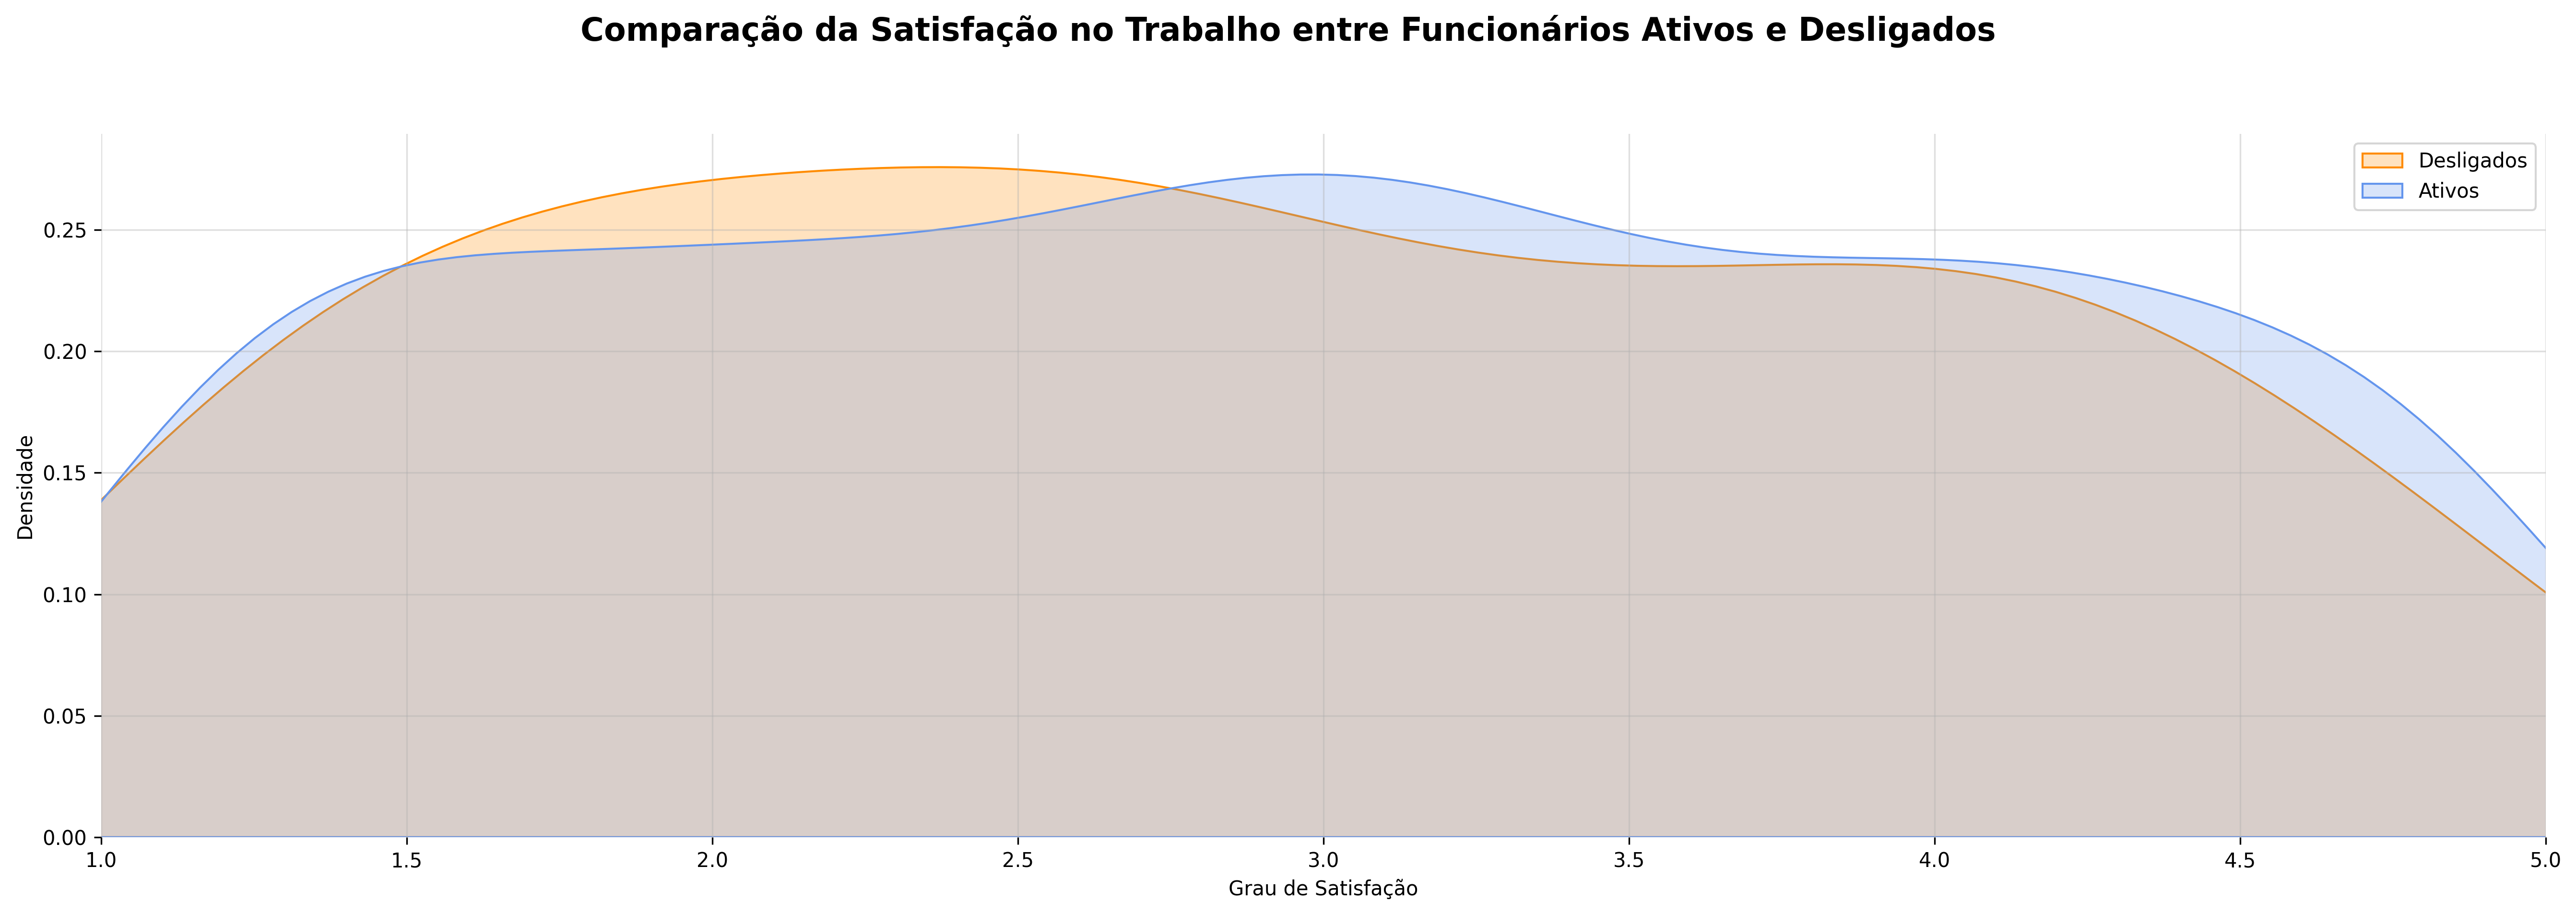

In [21]:
is_terminated = hr_data['Desligamento'] == 1
employee_terminated = hr_data[is_terminated]
employee_active = hr_data[~is_terminated]

fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(18, 6),
    dpi=300
)

fig.suptitle(
    t='Comparação da Satisfação no Trabalho entre Funcionários Ativos e Desligados',
    y=1.05,
    fontsize=16,
    weight='bold'
)

sns.kdeplot(
    employee_terminated['Satisfacao_Trabalho'],
    color='darkorange',
    label='Desligados',
    fill=True,
    ax=ax
)

sns.kdeplot(
    employee_active['Satisfacao_Trabalho'],
    color='cornflowerblue',
    label='Ativos',
    fill=True,
    ax=ax
)

ax.set_xlabel('Grau de Satisfação')
ax.set_ylabel('Densidade')
ax.legend()

ax.set_xlim(1, 5)

ax.grid(True, alpha=0.4)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()

plt.savefig('../reports/figures/comparativo-satisfacao-desligamento.png', dpi=300)

plt.show()

*Resposta*

A alta sobreposição das curvas sugere que a satisfação no trabalho não é um fator determinante para os desligamentos. As diferenças sutis observadas indicam que funcionários menos satisfeitos podem ter uma probabilidade ligeiramente maior de serem desligados. No entanto, essa relação é fraca e não deve ser considerada um fator significativo para os desligamentos.

##### *Análise de Rotatividade: Quais níveis de cargo têm a maior taxa de rotatividade e por quê ?*

In [9]:
total_count = hr_data.Nivel_Cargo.value_counts().reset_index()
total_count.rename(columns={'count': 'Total_Funcionarios'}, inplace=True)

termination_count = employee_terminated.groupby('Nivel_Cargo')['Desligamento'].sum().reset_index()

In [10]:
turnover_analysis = pd.merge(termination_count, total_count, on='Nivel_Cargo')
turnover_analysis['Taxa_Rotatividade'] = turnover_analysis['Desligamento'] / turnover_analysis['Total_Funcionarios']
turnover_analysis = turnover_analysis.sort_values(by='Taxa_Rotatividade', ascending=False, ignore_index=True)
turnover_analysis

,Nivel_Cargo,Desligamento,Total_Funcionarios,Taxa_Rotatividade
0,Junior,56,233,0.24
1,Sênior,43,192,0.22
2,Pleno,45,225,0.20


*Resposta*

Ao comparar as taxas de rotatividade ao longo em todo o período, observa-se que os três níveis de cargo possuem taxas de rotatividade semelhantes, com pequenas variações. A taxa de rotatividade para o nível Junior é de 0,24, seguida pelo nível Sênior com 0,22, e pelo nível Pleno com 0,20.

  ##### *Perfil dos Funcionários Desligados: Quais são as características comuns dos funcionários que deixam a empresa em termos de idade, tempo de serviço e desempenho?*

In [11]:
profile_terminated = employee_terminated.groupby('Nivel_Cargo').agg({
    'Idade': ['mean', 'median', 'std'],
    'Meses_de_Servico': ['mean', 'median', 'std'],
    'Pontuacao_Desempenho': ['mean', 'median', 'std']
}).reset_index()

profile_terminated.columns = [
    'Nivel_Cargo', 
    'Idade_Media', 'Idade_Mediana', 'Idade_Desvio_Padrao', 
    'Meses_Servico_Medio', 'Meses_Servico_Mediana', 'Meses_Servico_Desvio_Padrao',
    'Pontuacao_Desempenho_Media', 'Pontuacao_Desempenho_Mediana', 'Pontuacao_Desempenho_Desvio_Padrao']

profile_terminated

,Nivel_Cargo,Idade_Media,Idade_Mediana,Idade_Desvio_Padrao,Meses_Servico_Medio,Meses_Servico_Mediana,Meses_Servico_Desvio_Padrao,Pontuacao_Desempenho_Media,Pontuacao_Desempenho_Mediana,Pontuacao_Desempenho_Desvio_Padrao
0,Junior,20.89,21.00,1.93,15.89,13.50,10.40,3.16,3.09,1.27
1,Pleno,28.62,29.00,3.50,18.56,19.00,8.96,3.32,3.65,1.17
2,Sênior,38.14,39.00,6.17,18.56,18.00,10.20,3.52,3.69,1.11


*Resposta*

**Junior:** Os funcionários desligados têm, em média, 21 anos de idade, um tempo de serviço de aproximadamente 13 meses e uma pontuação de desempenho em torno de 3 

**Pleno:** Os funcionários desligados têm, em média, 29 anos de idade, um tempo de serviço de aproximadamente 19 meses e uma pontuação de desempenho em torno de 3.7

**Sênior:** Os funcionários desligados têm, em média, 39 anos de idade, um tempo de seviço de aproximadamente 18 meses e uma pontuação de desempenho em torno de 3.7

##### *Perfil dos Funcionários Desligados: Existe uma relação entre a pontuação de desempenho dos funcionários e a probabilidade de desligamento?*

*Conclusões preliminares*

Os resultados sugerem uma diferenças significativa nas pontuações de desempenho entre os funcionários ativos e desligados, como ilustrado no gráfico abaixo. No entanto, para determinar a relevância prática dessa pontuação na probabilidade de desligamento, são necessárias análises adicionais.

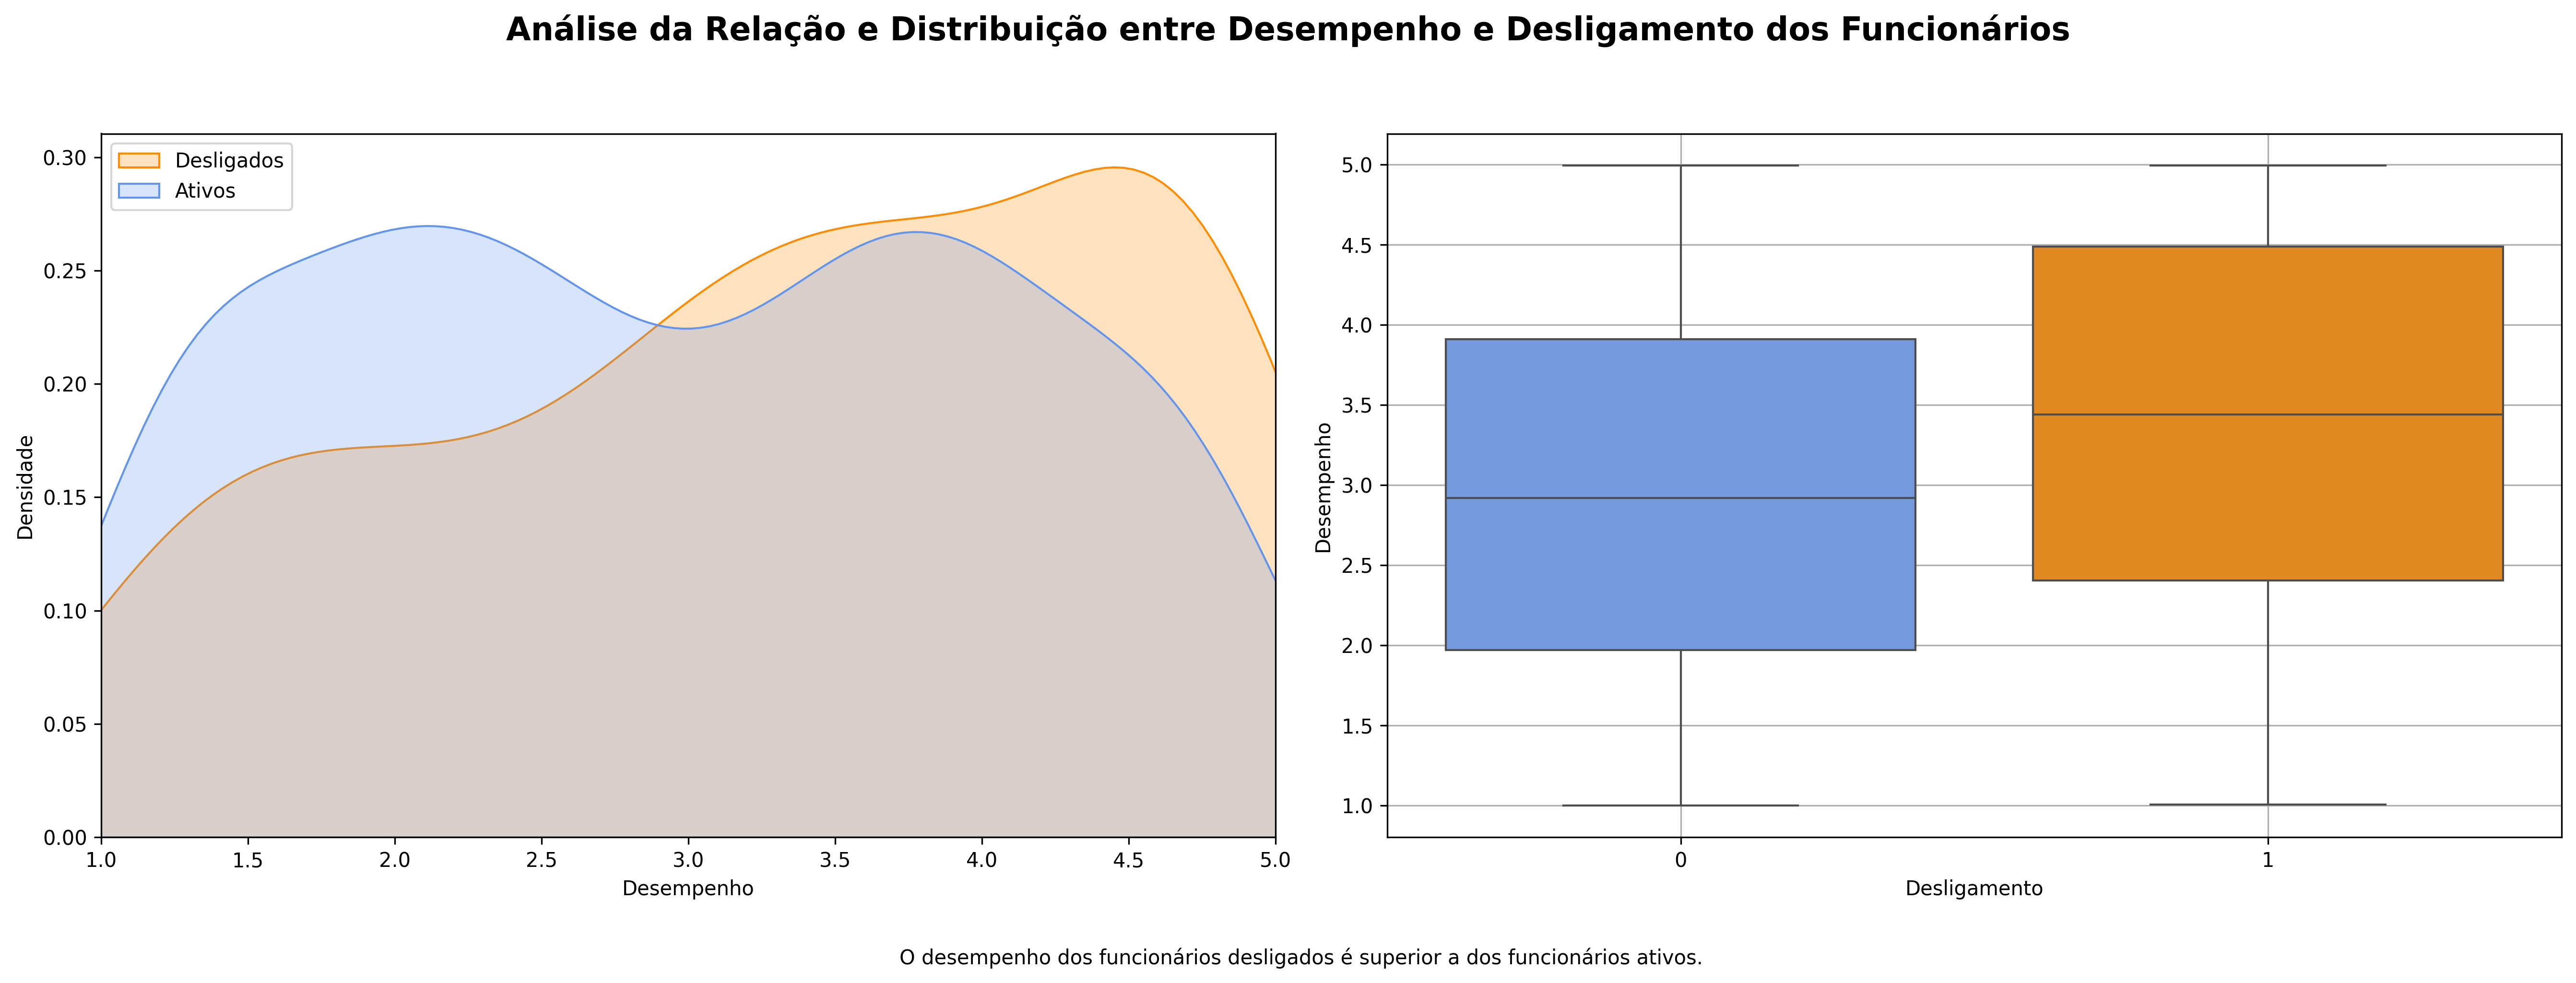

In [25]:
palette = {0: 'cornflowerblue', 1: 'darkorange'}

fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(18, 6),
    dpi=300
)

fig.suptitle(
    t='Análise da Relação e Distribuição entre Desempenho e Desligamento dos Funcionários',
    fontsize=16,
    y=1.05,
    weight=600
)

sns.kdeplot(
    employee_terminated['Pontuacao_Desempenho'],
    color='darkorange',
    label='Desligados',
    fill=True,
    legend=True,
    ax=axes[0]
)

sns.kdeplot(
    employee_active['Pontuacao_Desempenho'],
    color='cornflowerblue',
    label='Ativos',
    fill=True,
    legend=True,
    ax=axes[0],  
)
    

sns.boxplot(
    ax=axes[1],
    x='Desligamento',
    y='Pontuacao_Desempenho',
    data=hr_data,
    hue='Desligamento',
    palette=palette,
    legend=False
)

axes[0].set_xlabel('Desempenho')
axes[0].set_ylabel('Densidade')
axes[0].grid(False)
axes[0].set_xlim(1, 5)
axes[0].legend(loc='upper left')

axes[1].set_xlabel('Desligamento')
axes[1].set_ylabel('Desempenho')
axes[1].grid(True)

fig.text(
    x=0.35,
    y=-0.05,
    s='''O desempenho dos funcionários desligados é superior a dos funcionários ativos.'''
    )

plt.tight_layout()

plt.savefig('../reports/figures/relacao-distribuicao-desempenho-desligamento.png', dpi=300)

plt.show()

In [13]:
# Método Empregado: Coeficiente de Correlação de Ponto Bisserial

corr, p_value = pointbiserialr(hr_data.Pontuacao_Desempenho, hr_data.Desligamento)

print(f'Grau de correlação: {corr:.2f}') # Correlação extremamente fraca
print(f'P-valor: {p_value:.4f}') # Hipótese nula rejeitada

Grau de correlação: 0.13
P-valor: 0.0008


*Resposta*

O resultado final sugere que, embora exista uma relação entre o desempenho dos funcionários e o desligamento, a força dessa relação é pequena. Em outras palavras, a pontuação de desempenho tem um impacto comprovado, mas relativamente baixo.

##### *Perfil dos Funcionários Desligados: Há diferenças significativas nos salários entre os funcionários que permanecem e os que saem?*

In [14]:
median_salary_active = employee_active.groupby('Nivel_Cargo')['Salario'].median().reset_index().rename(columns={'Salario':'Mediana_Salario_Ativo'})
median_salary_terminated = employee_terminated.groupby('Nivel_Cargo')['Salario'].median().reset_index().rename(columns={'Salario':'Mediana_Salario_Desligado'})

median_salary = pd.merge(left=median_salary_active, right=median_salary_terminated, on='Nivel_Cargo')
median_salary['Salario_Diferenca'] = abs(median_salary['Mediana_Salario_Desligado'] - median_salary['Mediana_Salario_Ativo'])
median_salary['Salario_Diferenca_Percentual'] = (median_salary['Salario_Diferenca'] / median_salary['Mediana_Salario_Desligado']) * 100
median_salary

,Nivel_Cargo,Mediana_Salario_Ativo,Mediana_Salario_Desligado,Salario_Diferenca,Salario_Diferenca_Percentual
0,Junior,3651.15,3592.81,58.34,1.62
1,Pleno,5908.93,6068.04,159.11,2.62
2,Sênior,9409.97,9635.86,225.89,2.34


*Resposta*

Os salários entre funcionários ativos e desligados não apresentam uma diferença significativa.

##### *Impacto das Horas Extras: As horas extras têm alguma influência na decisão de um funcionário deixar a empresa?*

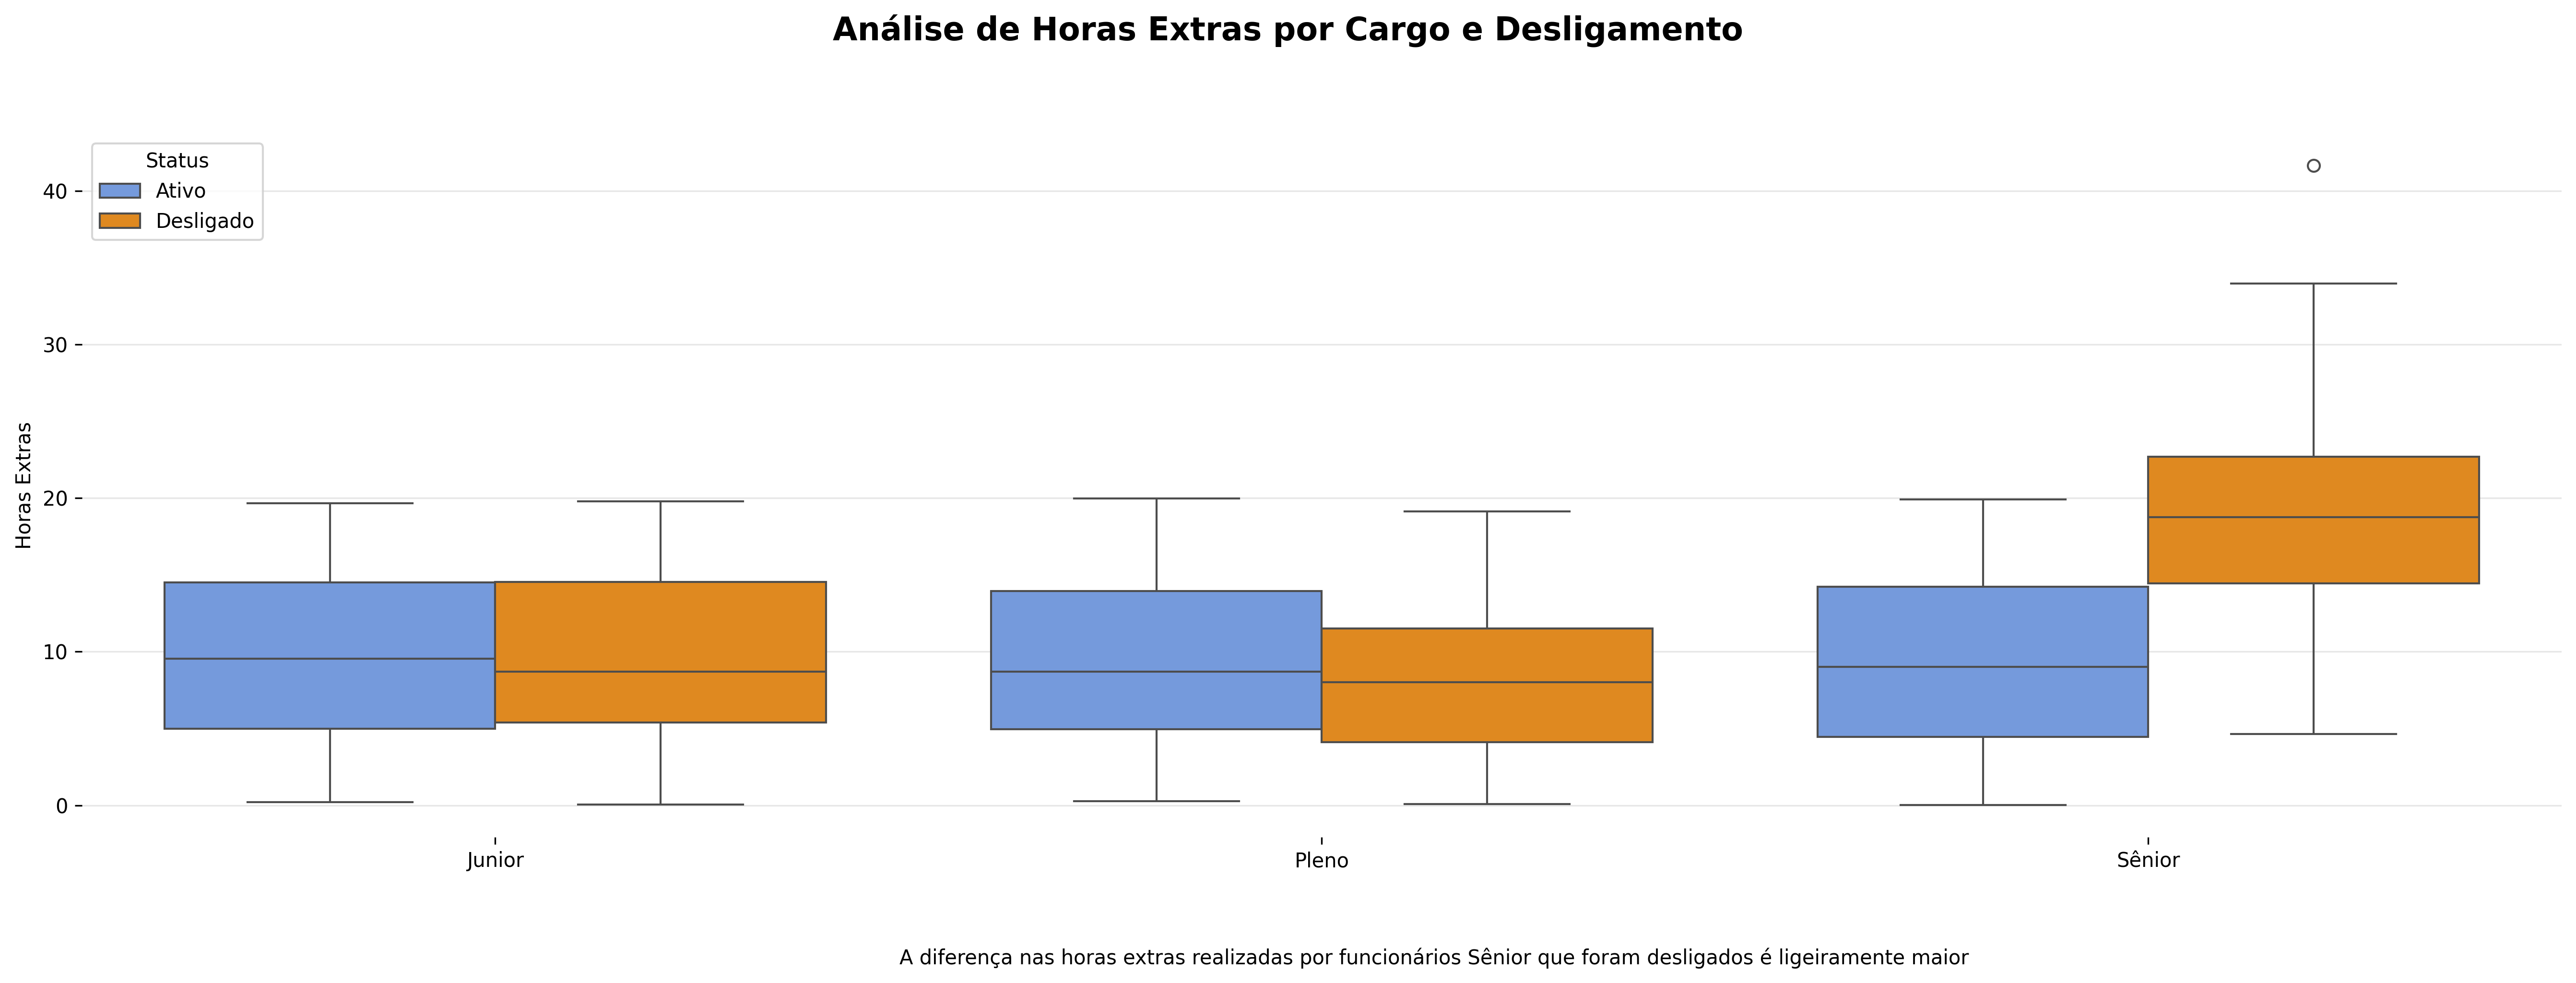

In [26]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(18, 6),
    dpi=300
)

fig.suptitle(
    t='Análise de Horas Extras por Cargo e Desligamento',
    y=1.05,
    fontsize=16,
    weight='bold'
)

sns.boxplot(
    data=hr_data,
    y='Horas_Extras',
    x='Nivel_Cargo',
    palette=['cornflowerblue', 'darkorange'],
    hue='Desligamento',
    order=['Junior', 'Pleno', 'Sênior'],
    ax=ax 
)

ax.set_xlabel(' ')
ax.set_ylabel('Horas Extras')

ax.grid(axis='y', alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
labels = ['Ativo' if label == '0' else 'Desligado' for label in labels]
ax.legend(handles, labels, title='Status', loc='upper left')

for spine in ax.spines.values():
    spine.set_visible(False)

fig.text(
    x=0.35,
    y=-0.05,
    s='''A diferença nas horas extras realizadas por funcionários Sênior que foram desligados é ligeiramente maior'''
)

plt.tight_layout()

plt.savefig('../reports/figures/analise-horas-extras-por-cargo-e-desligamento.png', dpi=300)

plt.show()

*Resposta*

A alta quantidade de horas extras realizadas pode ser um fator que influencia os funcionários Sênior a deixarem a empresa.

##### *Impacto das Horas Extras: Qual é o perfil dos funcionários que realizam mais horas extras e como isso se relaciona com a rotatividade?*


In [27]:
senior_employeers = hr_data[hr_data['Nivel_Cargo'] == 'Sênior']
senior_terminated = senior_employeers[senior_employeers['Desligamento'] == 1]
senior_active = senior_employeers[senior_employeers['Desligamento'] == 0]

overtime = {
    'Overtime_Median': [senior_active['Horas_Extras'].median(), senior_terminated['Horas_Extras'].median()],
    'Satisfaction_Median': [senior_active['Satisfacao_Trabalho'].median(), senior_terminated['Satisfacao_Trabalho'].median()],
    'Performance_Median': [senior_active['Pontuacao_Desempenho'].median(), senior_terminated['Pontuacao_Desempenho'].median()],
    'Time_Service_Median': [senior_active['Meses_de_Servico'].median(), senior_terminated['Meses_de_Servico'].median()],
    'Age_Median': [senior_active['Idade'].median(), senior_terminated['Idade'].median()]
}

overtime_senior_info = pd.DataFrame(overtime, index=['Active', 'Terminated'])
overtime_senior_info

,Overtime_Median,Satisfaction_Median,Performance_Median,Time_Service_Median,Age_Median
Active,9.00,3.16,3.14,18.00,37.00
Terminated,18.76,2.56,3.69,18.00,39.00


*Resposta*

Funcionários seniores que estão se desligando, apesar de terem tempo de serviço e idade quase idênticos aos funcionários ativos, faziam o dobro de horas extras, apresentavam uma performance superior, porém uma satisfação no trabalho mais baixa.


##### *Análise Temporal e Padrões: Existe um padrão sazonal ou temporal nos desligamentos dos funcionários?*

##### *Análise Temporal e Padrões: Como a duração do serviço dos funcionários afeta a probabilidade de desligamento?*

##### *Previsão e Intervenção: Podemos identificar antecipadamente os funcionários com maior risco de desligamento com base nas características disponíveis?*

##### *Previsão e Intervenção: Quais medidas ou políticas internas poderiam ser implementadas para reduzir a rotatividade?*